<a href="https://www.kaggle.com/code/lalit7881/wfh-burnout-analysis-ml-94?scriptVersionId=295233965" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/work-from-home-employee-burnout-dataset/work_from_home_burnout_dataset.csv


## Import Libraries

In [2]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Title:
WFH Burnout Analysis

## Detailed Description:
This analysis explores the phenomenon of burnout among employees working from home (WFH). With the widespread adoption of remote work, many professionals face unique challenges such as blurred boundaries between work and personal life, prolonged screen time, isolation, and increased workload. The study examines factors contributing to WFH burnout, including mental fatigue, stress levels, work hours, communication overload, and lack of social interaction. Using survey data, productivity metrics, and wellness indicators, the analysis identifies patterns of burnout, highlights high-risk groups, and provides actionable insights for organizations to improve employee well-being, maintain engagement, and optimize remote work strategies. This comprehensive examination aims to help companies implement policies and practices that reduce burnout while sustaining productivity in a remote work environment.

In [3]:
df = pd.read_csv("/kaggle/input/work-from-home-employee-burnout-dataset/work_from_home_burnout_dataset.csv")

In [4]:
df.head()

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
0,1,Weekday,9.59,11.86,4,2,0,7.55,91.2,19.17,Low
1,1,Weekend,7.38,10.33,4,1,0,6.69,82.0,29.70,Low
2,1,Weekend,6.31,8.92,1,2,0,8.87,80.6,32.93,Low
3,1,Weekday,8.34,10.70,4,1,1,8.13,70.0,45.47,Low
4,1,Weekend,6.97,9.83,1,2,0,5.85,67.1,51.61,Low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1800 non-null   int64  
 1   day_type              1800 non-null   object 
 2   work_hours            1800 non-null   float64
 3   screen_time_hours     1800 non-null   float64
 4   meetings_count        1800 non-null   int64  
 5   breaks_taken          1800 non-null   int64  
 6   after_hours_work      1800 non-null   int64  
 7   sleep_hours           1800 non-null   float64
 8   task_completion_rate  1800 non-null   float64
 9   burnout_score         1800 non-null   float64
 10  burnout_risk          1800 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 154.8+ KB


In [6]:
df.describe()

,user_id,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,90.500000,6.515117,9.271406,1.941111,3.028889,0.358889,6.996467,72.308556,44.009978
std,51.975162,2.290521,2.409253,1.696178,1.417844,0.479808,1.061740,14.978647,23.881782
min,1.000000,3.000000,4.510000,0.000000,1.000000,0.000000,4.500000,40.000000,2.500000
25%,45.750000,4.430000,7.240000,1.000000,2.000000,0.000000,6.280000,62.300000,25.370000
50%,90.500000,6.445000,9.210000,2.000000,3.000000,0.000000,6.990000,74.500000,39.270000
75%,135.250000,8.510000,11.310000,3.000000,4.000000,1.000000,7.750000,83.700000,58.197500
max,180.000000,12.170000,15.700000,10.000000,5.000000,1.000000,10.800000,107.200000,143.920000


In [7]:
df.isnull().sum()

user_id                 0
day_type                0
work_hours              0
screen_time_hours       0
meetings_count          0
breaks_taken            0
after_hours_work        0
sleep_hours             0
task_completion_rate    0
burnout_score           0
burnout_risk            0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df["burnout_risk"].value_counts()

burnout_risk
Low       1527
Medium     253
High        20
Name: count, dtype: int64

In [10]:
df.columns

Index(['user_id', 'day_type', 'work_hours', 'screen_time_hours',
       'meetings_count', 'breaks_taken', 'after_hours_work', 'sleep_hours',
       'task_completion_rate', 'burnout_score', 'burnout_risk'],
      dtype='object')

## Data visualizations

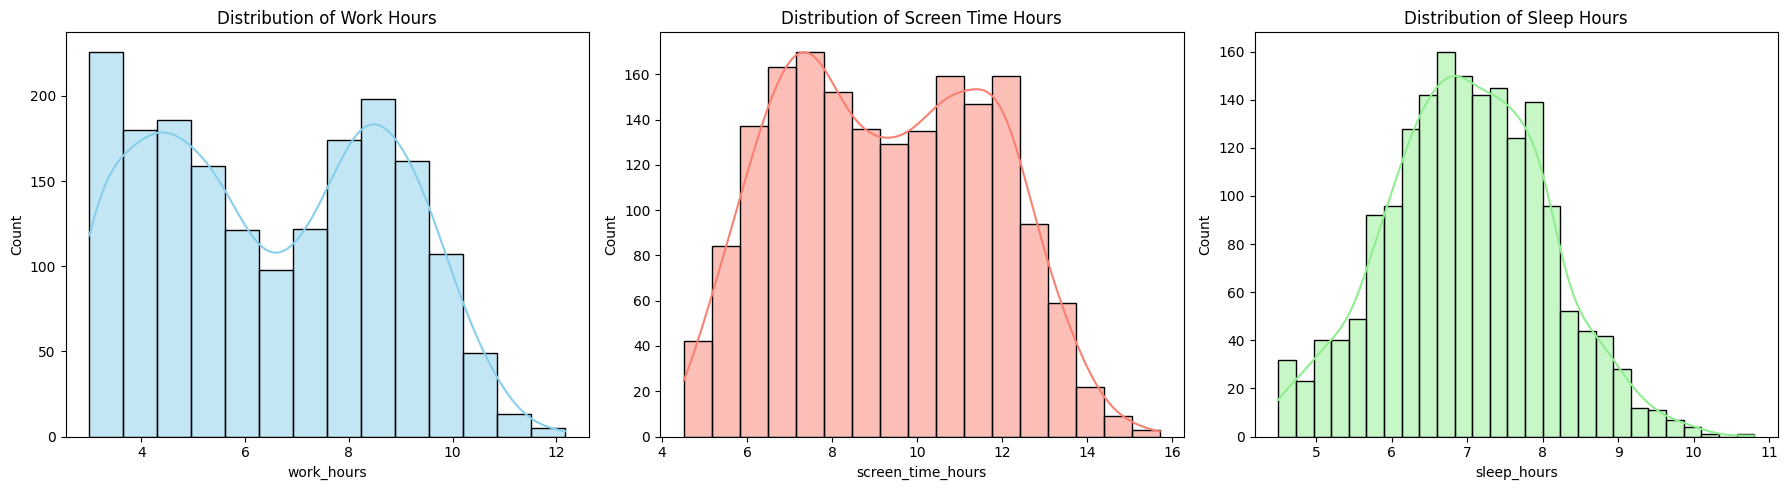

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(df['work_hours'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Work Hours')

sns.histplot(df['screen_time_hours'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Screen Time Hours')

sns.histplot(df['sleep_hours'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribution of Sleep Hours')

plt.tight_layout()
plt.show()

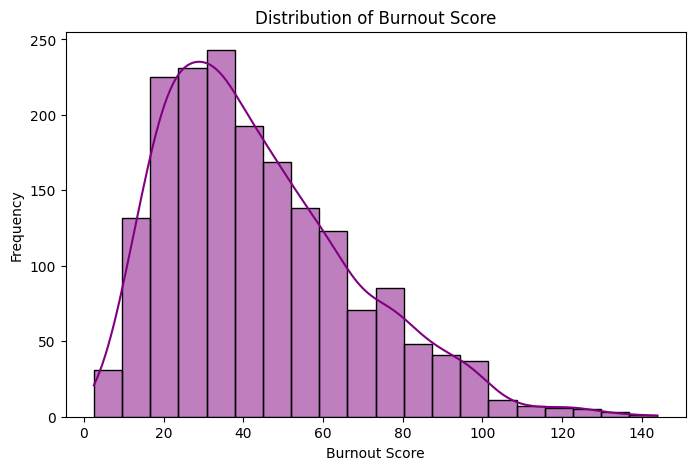

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['burnout_score'], bins=20, kde=True, color='purple')
plt.title('Distribution of Burnout Score')
plt.xlabel('Burnout Score')
plt.ylabel('Frequency')
plt.show()


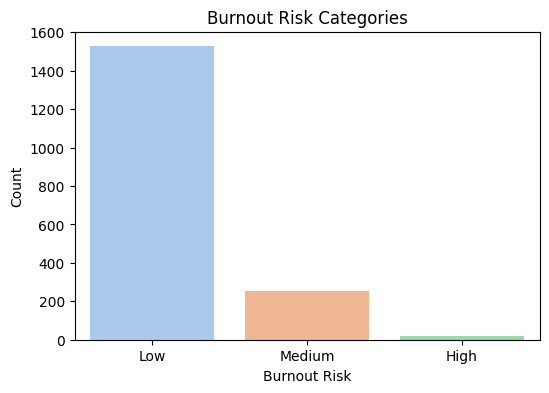

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='burnout_risk', data=df, palette='pastel')
plt.title('Burnout Risk Categories')
plt.xlabel('Burnout Risk')
plt.ylabel('Count')
plt.show()

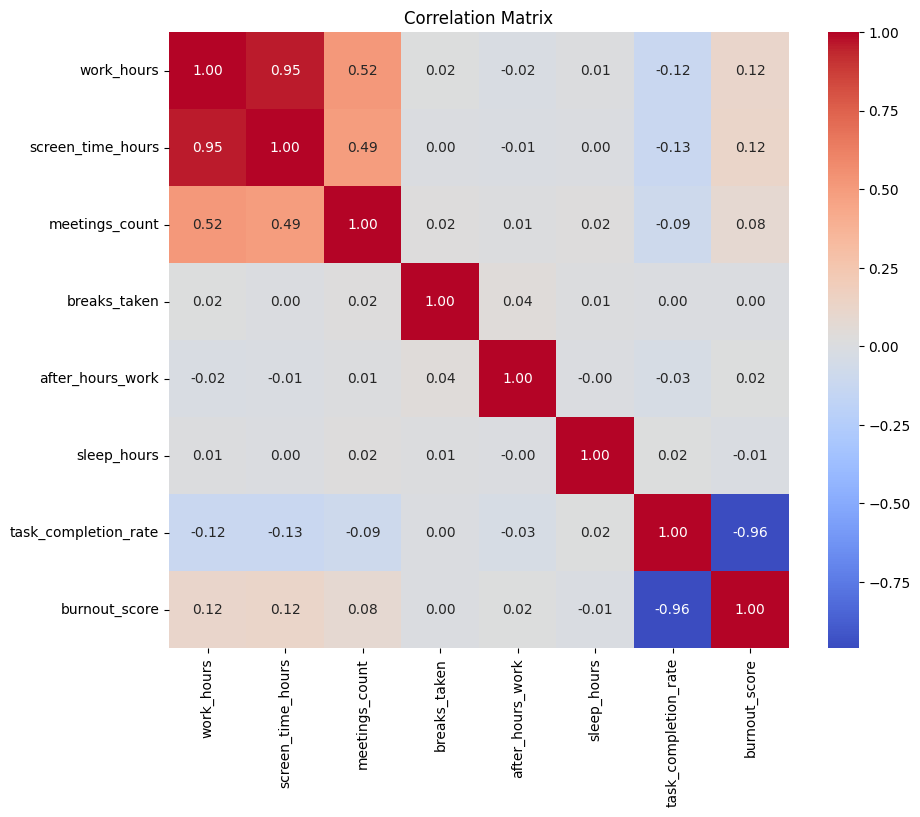

In [14]:
plt.figure(figsize=(10,8))
corr = df[['work_hours', 'screen_time_hours', 'meetings_count', 'breaks_taken',
           'after_hours_work', 'sleep_hours', 'task_completion_rate', 'burnout_score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

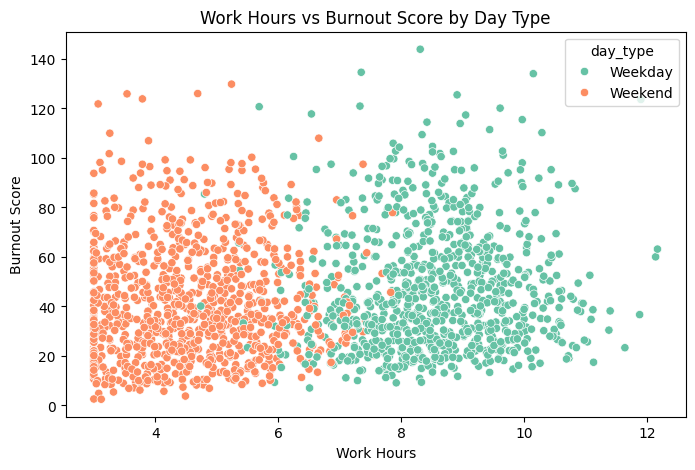

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='work_hours', y='burnout_score', hue='day_type', data=df, palette='Set2')
plt.title('Work Hours vs Burnout Score by Day Type')
plt.xlabel('Work Hours')
plt.ylabel('Burnout Score')
plt.show()

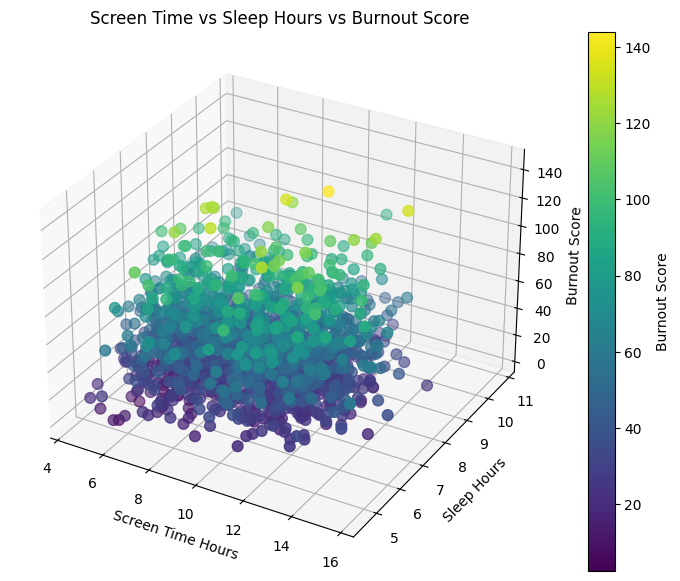

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['screen_time_hours'], df['sleep_hours'], df['burnout_score'],
                c=df['burnout_score'], cmap='viridis', s=60)
ax.set_xlabel('Screen Time Hours')
ax.set_ylabel('Sleep Hours')
ax.set_zlabel('Burnout Score')
plt.title('Screen Time vs Sleep Hours vs Burnout Score')
plt.colorbar(sc, label='Burnout Score')
plt.show()

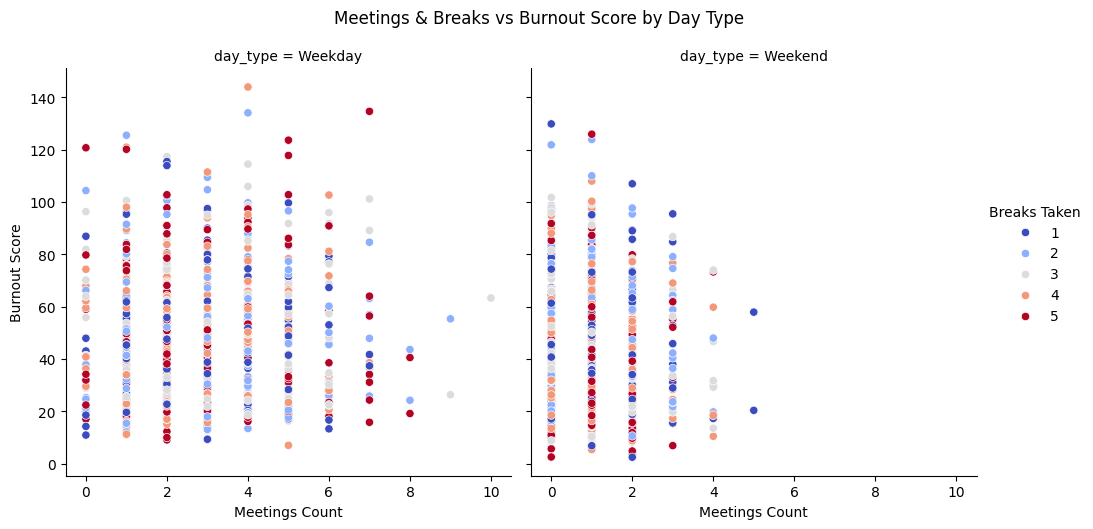

In [17]:
g = sns.FacetGrid(df, col='day_type', height=5, aspect=1)
g.map_dataframe(sns.scatterplot, x='meetings_count', y='burnout_score', hue='breaks_taken', palette='coolwarm')
g.add_legend(title='Breaks Taken')
g.set_axis_labels('Meetings Count', 'Burnout Score')
g.fig.suptitle('Meetings & Breaks vs Burnout Score by Day Type', y=1.05)
plt.show()

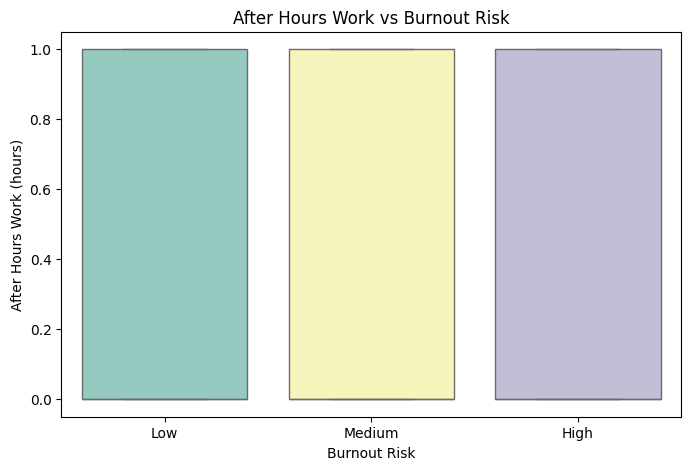

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='burnout_risk', y='after_hours_work', data=df, palette='Set3')
plt.title('After Hours Work vs Burnout Risk')
plt.xlabel('Burnout Risk')
plt.ylabel('After Hours Work (hours)')
plt.show()

## ML 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [20]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report,
    confusion_matrix
)

In [21]:
le = LabelEncoder()
df["day_type"] = le.fit_transform(df["day_type"])


In [22]:
features = [
    "day_type",
    "work_hours",
    "screen_time_hours",
    "meetings_count",
    "breaks_taken",
    "after_hours_work",
    "sleep_hours",
    "task_completion_rate"
]

X = df[features]
y = df["burnout_score"]   # Regression target


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}


In [26]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(
    results,
    columns=["Model", "MAE", "RMSE", "R2"]
)

print(results_df.sort_values(by="RMSE"))


               Model       MAE      RMSE        R2
5  Gradient Boosting  4.578182  5.793039  0.940512
4      Random Forest  4.818510  6.122135  0.933562
0  Linear Regression  4.800197  6.134106  0.933301
1   Ridge Regression  4.800760  6.135350  0.933274
2   Lasso Regression  4.800664  6.136413  0.933251
3      Decision Tree  6.562722  8.508307  0.871678
6                SVR  6.467738  8.615496  0.868425
7                KNN  7.066961  9.006200  0.856221


In [27]:
best_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

best_model.fit(X_train_scaled, y_train)
y_pred_score = best_model.predict(X_test_scaled)


In [28]:
mae = mean_absolute_error(y_test, y_pred_score)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_score))
r2 = r2_score(y_test, y_pred_score)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 4.818509814814817
RMSE: 6.122135434718094
R2 Score: 0.9335615585059138


In [29]:
def burnout_score_to_risk(score):
    if score < 40:
        return "Low"
    elif score < 70:
        return "Medium"
    else:
        return "High"


In [30]:
predicted_risk = [burnout_score_to_risk(s) for s in y_pred_score]
true_risk = df.loc[y_test.index, "burnout_risk"]

risk_map = {"Low": 0, "Medium": 1, "High": 2}

pred_encoded = [risk_map[r] for r in predicted_risk]
true_encoded = [risk_map[r] for r in true_risk]


In [31]:
print("Accuracy:", accuracy_score(true_encoded, pred_encoded))

print("\nClassification Report:\n",
      classification_report(
          true_encoded,
          pred_encoded,
          target_names=["Low", "Medium", "High"]
      ))


Accuracy: 0.575

Classification Report:
               precision    recall  f1-score   support

         Low       1.00      0.64      0.78       305
      Medium       0.08      0.17      0.11        53
        High       0.04      1.00      0.08         2

    accuracy                           0.57       360
   macro avg       0.37      0.60      0.32       360
weighted avg       0.86      0.57      0.68       360



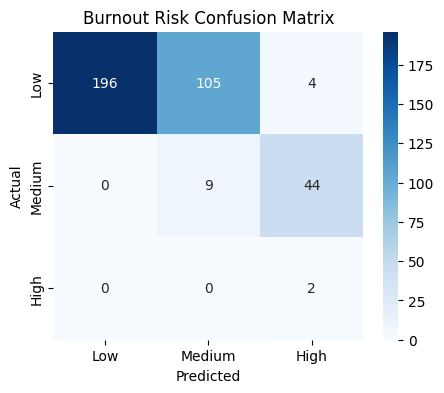

In [32]:
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(true_encoded, pred_encoded),
    annot=True, fmt="d", cmap="Blues",
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)
plt.title("Burnout Risk Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [33]:
sample = pd.DataFrame({
    "day_type": [1],
    "work_hours": [9.5],
    "screen_time_hours": [12.2],
    "meetings_count": [5],
    "breaks_taken": [1],
    "after_hours_work": [1],
    "sleep_hours": [5.6],
    "task_completion_rate": [60]
})

sample_scaled = scaler.transform(sample)
pred_score = best_model.predict(sample_scaled)[0]
pred_risk = burnout_score_to_risk(pred_score)

print("Predicted Burnout Score:", round(pred_score, 2))
print("Predicted Burnout Risk:", pred_risk)


Predicted Burnout Score: 59.73
Predicted Burnout Risk: Medium


## Thank you...pls upvote!!!!